## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/MIDAS Internship/train'

/content/drive/MyDrive/MIDAS Internship/train


## Improting the Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage import io
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

## Defining the Data Generators
Used to Load the Training and Validation data on the fly directly from the drive to train along with Data Augmentations

In [ ]:
input_shape = (75, 100, 1)
img_width = 75
img_height = 100
num_classes = 62
batch_size = 32
epochs = 10

train_data_dir = './'

datagen_args = dict( 
    rescale=1./255 ,
    rotation_range=10,
    zoom_range = 0.10,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.5,
    fill_mode = 'nearest',
    validation_split=0.2)
datagen = ImageDataGenerator(**datagen_args)
datagenerator = datagen.flow_from_directory(
    './',target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode = 'categorical',
    # interpolation="lanczos",
    shuffle=True , 
    subset='training')

validation_generator = datagen.flow_from_directory(
    './', 
    target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode = 'categorical',
    # interpolation="lanczos",
    shuffle=False ,
    subset='validation')

Found 1985 images belonging to 62 classes.
Found 496 images belonging to 62 classes.


## Some Specifications of the Training data

In [ ]:
print("Number of Samples in training : " , datagenerator.samples)
print("Number of Classes : " , len(datagenerator.class_indices))
print("Number of Samples per class : " , datagenerator.samples // len(datagenerator.class_indices))

Number of Samples in training :  1985
Number of Classes :  62
Number of Samples per class :  32


In [ ]:
print(datagenerator.class_indices)

{'Sample001': 0, 'Sample002': 1, 'Sample003': 2, 'Sample004': 3, 'Sample005': 4, 'Sample006': 5, 'Sample007': 6, 'Sample008': 7, 'Sample009': 8, 'Sample010': 9, 'Sample011': 10, 'Sample012': 11, 'Sample013': 12, 'Sample014': 13, 'Sample015': 14, 'Sample016': 15, 'Sample017': 16, 'Sample018': 17, 'Sample019': 18, 'Sample020': 19, 'Sample021': 20, 'Sample022': 21, 'Sample023': 22, 'Sample024': 23, 'Sample025': 24, 'Sample026': 25, 'Sample027': 26, 'Sample028': 27, 'Sample029': 28, 'Sample030': 29, 'Sample031': 30, 'Sample032': 31, 'Sample033': 32, 'Sample034': 33, 'Sample035': 34, 'Sample036': 35, 'Sample037': 36, 'Sample038': 37, 'Sample039': 38, 'Sample040': 39, 'Sample041': 40, 'Sample042': 41, 'Sample043': 42, 'Sample044': 43, 'Sample045': 44, 'Sample046': 45, 'Sample047': 46, 'Sample048': 47, 'Sample049': 48, 'Sample050': 49, 'Sample051': 50, 'Sample052': 51, 'Sample053': 52, 'Sample054': 53, 'Sample055': 54, 'Sample056': 55, 'Sample057': 56, 'Sample058': 57, 'Sample059': 58, 'Sampl

## An example of a batch of data load from the drive on the file using Data Generators

In [ ]:
x,y = next(datagenerator)
print("x.shape : " , x.shape)
print("y.shape : " , y.shape)


x.shape :  (32, 75, 100, 1)
y.shape :  (32, 62)


## Notion Used Throughout the Notebook:


*   **64C5** means a convolution layer with 64 feature maps using a 5x5 filter and stride 1

*   **64C5S2** means a convolution layer with 64 feature maps using a 5x5 filter and stride 2 

*   **MP2** means max pooling using 2x2 filter and stride 2

*   256FC means fully connected dense layer with 256 units





## Use of Various Layers Used

*   Conv2D -> Maxpooling2D : Feature Extraction
*   Flatten -> Dense : Classification
*   Droupout : Regularisation




## Experiment 1 : Number of Pairs of Sub-Sampling to be used


*   784 - [64C5-MP2] - 256 - 10

*   784 - [64C5-MP2] - [64C5-MP2] - 256 - 10

*   784 - [64C5-MP2] - [64C5-MP2] - [64C5-P2] - 256 - 10

*   784 - [64C5-MP2] - [64C5-MP2] - [64C5-P2] - [64C5-P2] - 256 - 10

*   784 - [64C5-MP2] - [64C5-MP2] - [64C5-P2] - [64C5-P2] - [64C5-P2] - 256 - 10














In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu',
            input_shape=input_shape))
    model[j].add(MaxPooling2D())
    if j>0:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D(padding='same'))

    if j>2:
      model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
      model[j].add(MaxPooling2D(padding='same'))
    if j>3:
      model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
      model[j].add(MaxPooling2D(padding='same'))

    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(62, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3","(C-P)x4","(C-P)x5"]

for j in range(nets):
  history[j] = model[j].fit_generator(datagenerator, 
                            steps_per_epoch= datagenerator.samples // batch_size,
                            epochs=epochs, 
                            validation_data=validation_generator, 
                            validation_steps=validation_generator.samples // batch_size, 
                            #  verbose=0, 
                            callbacks=[annealer],
                            #  workers=8
                            )
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 35s 564ms/step - loss: 6.7428 - accuracy: 0.0211 - val_loss: 4.1178 - val_accuracy: 0.0312
Epoch 2/10
62/62 [==============================] - 34s 548ms/step - loss: 4.1161 - accuracy: 0.0205 - val_loss: 4.0857 - val_accuracy: 0.0208
Epoch 3/10
62/62 [==============================] - 34s 549ms/step - loss: 4.0778 - accuracy: 0.0231 - val_loss: 3.9719 - val_accuracy: 0.0583
Epoch 4/10
62/62 [==============================] - 34s 545ms/step - loss: 3.9599 - accuracy: 0.0583 - val_loss: 3.8167 - val_accuracy: 0.0750
Epoch 5/10
62/62 [==============================] - 34s 544ms/step - loss: 3.7122 - accuracy: 0.0969 - val_loss: 3.6250 - val_accuracy: 0.0854
Epoch 6/10
62/62 [==============================] - 34s 546ms/step - loss: 3.5095 - accuracy: 0.1164 - val_loss: 3.4965 - val_accuracy: 0.1208
Epoch 7/10
62/62 [==============================] - 34s 545ms/step - loss: 3.3425 - accuracy: 0.1289 - val_loss: 3.3614 - val_accuracy: 0.1333

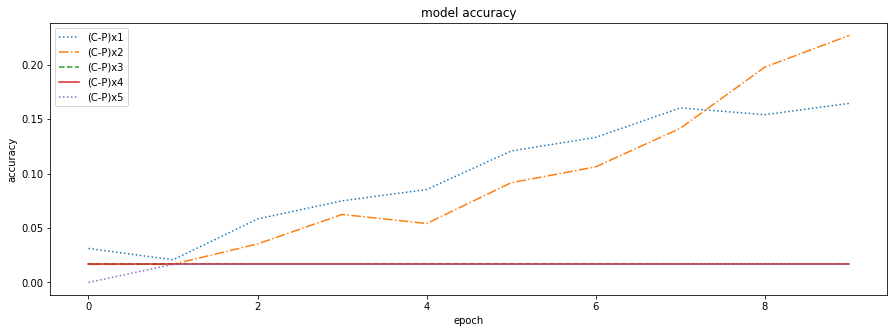

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

## Results of Experiment 1 :
From the experiment, it is clearly visible that 2 Pairs of Convolutional Sub-Sampling works best. Moreover a Sub-Sampling of 3 or more layers gives almost random results because of the the fact that, the size of the images data halves with each Sub-Sampling and thus eating up a lot of information

## Experiment 2 : Number of Feature maps

*   784 - [8C5-MP2] - [16C5-MP2] - 256 - 10

*   784 - [16C5-MP2] - [32C5-MP2] - 256 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 256 - 10

*   784 - [64C5-MP2] - [128C5-MP2] - 256 - 10

*   784 - [128C5-MP2] - [256C5-MP2] - 256 - 10

*   784 - [256C5-MP2] - [512C5-MP2] - 256 - 10












In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(2**(j+3),kernel_size=5,activation='relu',input_shape=input_shape))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(2**(j+4),kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(62, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * nets
names = ["8 maps","16 maps","32 maps","64 maps","128 maps","256 maps"]

for j in range(nets):
  history[j] = model[j].fit_generator(datagenerator, 
                            steps_per_epoch= datagenerator.samples // batch_size,
                            epochs=epochs, 
                            validation_data=validation_generator, 
                            validation_steps=validation_generator.samples // batch_size, 
                            #  verbose=0, 
                            callbacks=[annealer],
                            #  workers=8
                            )
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 35s 553ms/step - loss: 4.3138 - accuracy: 0.0124 - val_loss: 4.1202 - val_accuracy: 0.0188
Epoch 2/10
62/62 [==============================] - 34s 544ms/step - loss: 4.1174 - accuracy: 0.0274 - val_loss: 4.0853 - val_accuracy: 0.0229
Epoch 3/10
62/62 [==============================] - 34s 547ms/step - loss: 4.0694 - accuracy: 0.0317 - val_loss: 3.9724 - val_accuracy: 0.0646
Epoch 4/10
62/62 [==============================] - 34s 545ms/step - loss: 3.9441 - accuracy: 0.0681 - val_loss: 3.7129 - val_accuracy: 0.0604
Epoch 5/10
62/62 [==============================] - 34s 543ms/step - loss: 3.6691 - accuracy: 0.0864 - val_loss: 3.4546 - val_accuracy: 0.1562
Epoch 6/10
62/62 [==============================] - 34s 545ms/step - loss: 3.3168 - accuracy: 0.1535 - val_loss: 3.2506 - val_accuracy: 0.1771
Epoch 7/10
62/62 [==============================] - 34s 552ms/step - loss: 3.0640 - accuracy: 0.1938 - val_loss: 3.0710 - val_accuracy: 0.2229

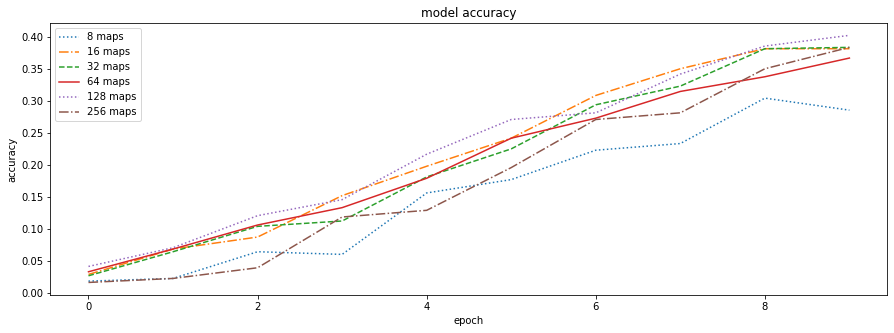

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

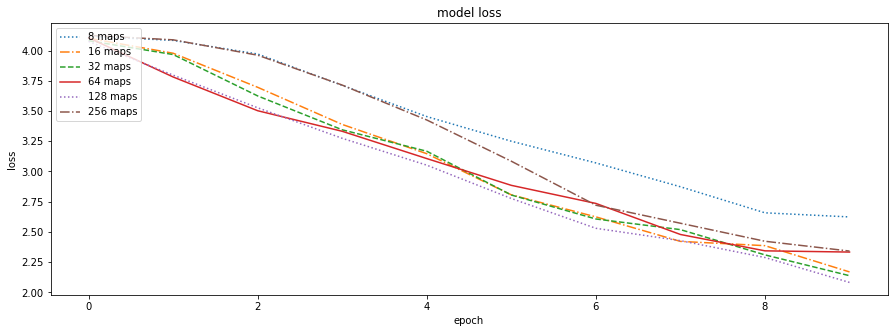

In [ ]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_loss'],linestyle=styles[i])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

## Results of Experiment 1 :
From the experiment, Its visible from the plot that 128, 32, and 16 maps give results very close to each other. I selected the model with 32-64 maps and not 128-256 maps because of the reason that for a slight increase in accuracy, a lot of COmputional power is compromised and hence its better to use 32-64 maps.    

## Experiment 3 : Number of Nuerons on Dense Layer


*   784 - [32C5-MP2] - [64C5-MP2] - 0 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 32 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 64 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 128 -10

*   784 - [32C5-MP2] - [64C5-MP2] - 256 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 512 -10

*   784 - [32C5-MP2] - [64C5-MP2] - 1024 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 2048 - 10






In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(62, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]

for j in range(nets):
  history[j] = model[j].fit_generator(datagenerator, 
                            steps_per_epoch= datagenerator.samples // batch_size,
                            epochs=epochs, 
                            validation_data=validation_generator, 
                            validation_steps=validation_generator.samples // batch_size, 
                            #  verbose=0, 
                            callbacks=[annealer],
                            #  workers=8
                            )
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 34s 550ms/step - loss: 4.2766 - accuracy: 0.0174 - val_loss: 4.1022 - val_accuracy: 0.0250
Epoch 2/10
62/62 [==============================] - 34s 543ms/step - loss: 4.0784 - accuracy: 0.0309 - val_loss: 3.9932 - val_accuracy: 0.0542
Epoch 3/10
62/62 [==============================] - 34s 544ms/step - loss: 3.9504 - accuracy: 0.0478 - val_loss: 3.8345 - val_accuracy: 0.0708
Epoch 4/10
62/62 [==============================] - 34s 544ms/step - loss: 3.7636 - accuracy: 0.0752 - val_loss: 3.6599 - val_accuracy: 0.1042
Epoch 5/10
62/62 [==============================] - 34s 543ms/step - loss: 3.5704 - accuracy: 0.1141 - val_loss: 3.5125 - val_accuracy: 0.1146
Epoch 6/10
62/62 [==============================] - 34s 542ms/step - loss: 3.4668 - accuracy: 0.1255 - val_loss: 3.4234 - val_accuracy: 0.1354
Epoch 7/10
62/62 [==============================] - 33s 542ms/step - loss: 3.3073 - accuracy: 0.1734 - val_loss: 3.3637 - val_accuracy: 0.1688

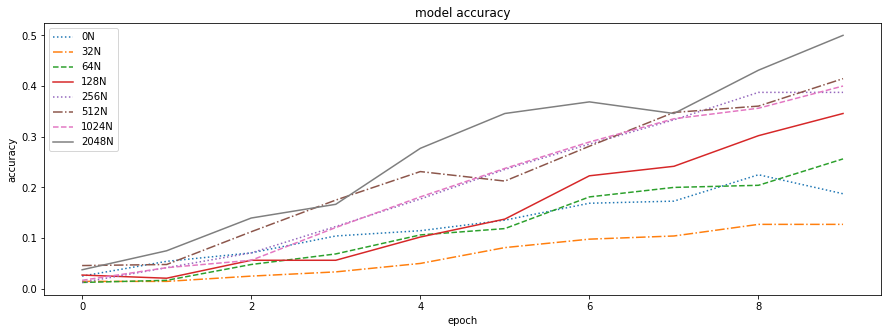

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

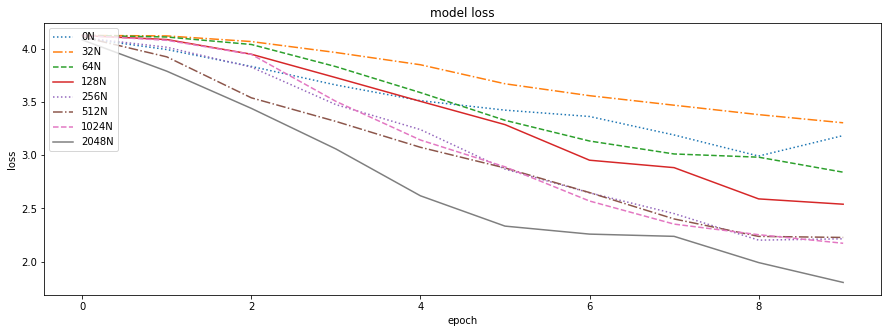

In [ ]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_loss'],linestyle=styles[i])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

## Results of Experiment 3 :
From the experiment, the layer with 2048 nuerons is a clear winner, and 1024,512, 256 nuerons following closely . Hence it would be only fair to check with a model with 2 layers of Dense layers. This is exactly whats done in the next cell.

## Experiment 4 : Double Layer of Dense Layers
*   784 - [32C5-MP2] - [64C5-MP2] - 256 - 128 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 512 - 256 -10

*   784 - [32C5-MP2] - [64C5-MP2] - 1024 - 512 - 10

*   784 - [32C5-MP2] - [64C5-MP2] - 2048 - 1024 - 10

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 4
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())

    model[j].add(Dense(2**(j+8), activation='relu'))
    model[j].add(Dense(2**(j+7), activation='relu'))

    model[j].add(Dense(62, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * nets
names = ["256N-128N","512N-256N","1024N-512N","2048N-1024N"]

for j in range(nets):
  history[j] = model[j].fit_generator(datagenerator, 
                            steps_per_epoch= datagenerator.samples // batch_size,
                            epochs=epochs, 
                            validation_data=validation_generator, 
                            validation_steps=validation_generator.samples // batch_size, 
                            #  verbose=0, 
                            callbacks=[annealer],
                            #  workers=8
                            )
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 35s 556ms/step - loss: 4.1931 - accuracy: 0.0132 - val_loss: 4.1268 - val_accuracy: 0.0167
Epoch 2/10
62/62 [==============================] - 35s 560ms/step - loss: 4.1255 - accuracy: 0.0216 - val_loss: 4.1095 - val_accuracy: 0.0250
Epoch 3/10
62/62 [==============================] - 35s 567ms/step - loss: 4.0890 - accuracy: 0.0305 - val_loss: 3.9806 - val_accuracy: 0.0354
Epoch 4/10
62/62 [==============================] - 35s 565ms/step - loss: 3.8738 - accuracy: 0.0647 - val_loss: 3.6146 - val_accuracy: 0.1042
Epoch 5/10
62/62 [==============================] - 34s 553ms/step - loss: 3.4759 - accuracy: 0.1168 - val_loss: 3.1651 - val_accuracy: 0.1729
Epoch 6/10
62/62 [==============================] - 33s 541ms/step - loss: 3.0650 - accuracy: 0.1742 - val_loss: 3.0204 - val_accuracy: 0.1896
Epoch 7/10
62/62 [==============================] - 34s 546ms/step - loss: 2.8035 - accuracy: 0.2391 - val_loss: 2.8956 - val_accuracy: 0.1792

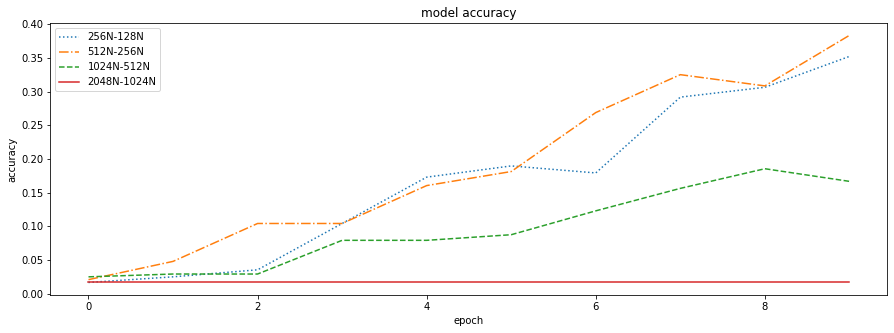

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

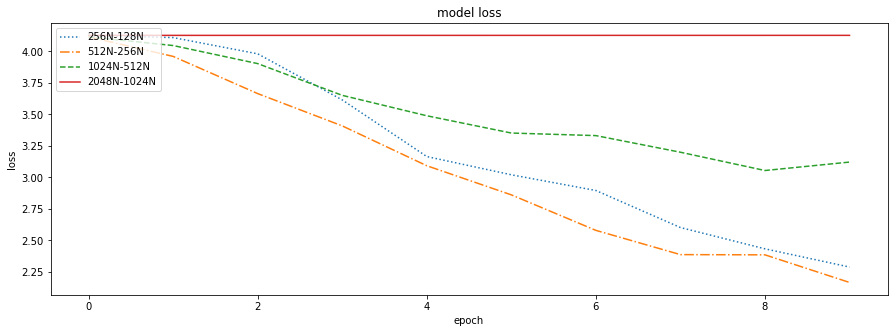

In [ ]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_loss'],linestyle=styles[i])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

## Result of Experiment 4 :
From this experiment, if we compare the results to the last experiment, a double Dense layer performs worse than all the better selected models in Experiment 3. Hence, we use a single Dense Layer. Just to be sure that the good results in model with 2048 nuerons network wasn't by chance, I again tested a model with 2048 dense Nuerons.

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 1
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())

    model[j].add(Dense(1024, activation='relu'))

    model[j].add(Dense(62, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * nets
names = ["256N-128N","512N-256N","1024N-512N","2048N-1024N"]

for j in range(nets):
  history[j] = model[j].fit_generator(datagenerator, 
                            steps_per_epoch= datagenerator.samples // batch_size,
                            epochs=epochs, 
                            validation_data=validation_generator, 
                            validation_steps=validation_generator.samples // batch_size, 
                            #  verbose=0, 
                            callbacks=[annealer],
                            #  workers=8
                            )
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 35s 558ms/step - loss: 4.5974 - accuracy: 0.0162 - val_loss: 4.1015 - val_accuracy: 0.0208
Epoch 2/10
62/62 [==============================] - 34s 550ms/step - loss: 4.0888 - accuracy: 0.0178 - val_loss: 4.0387 - val_accuracy: 0.0375
Epoch 3/10
62/62 [==============================] - 34s 556ms/step - loss: 3.9944 - accuracy: 0.0416 - val_loss: 3.8008 - val_accuracy: 0.0771
Epoch 4/10
62/62 [==============================] - 34s 551ms/step - loss: 3.6441 - accuracy: 0.0898 - val_loss: 3.4397 - val_accuracy: 0.1187
Epoch 5/10
62/62 [==============================] - 34s 557ms/step - loss: 3.2919 - accuracy: 0.1417 - val_loss: 3.1024 - val_accuracy: 0.1937
Epoch 6/10
62/62 [==============================] - 34s 551ms/step - loss: 2.9377 - accuracy: 0.2151 - val_loss: 2.9600 - val_accuracy: 0.2042
Epoch 7/10
62/62 [==============================] - 34s 551ms/step - loss: 2.6831 - accuracy: 0.2758 - val_loss: 2.7650 - val_accuracy: 0.2688

## Reults :
As was my suspicion that the model with 2048 Nuerons giving a goood result is by chance because of very good random initialization of the weights, is confirmed by a low performing model in this experiment. Hence we Select a Model with 256 dense nueron in a single layer. Though models with 512 and 1024 nuerons performed slightly better, but increasing the computational resourses isn't worth it.

## Experiment 5 : Amount of Dropout


*   0%, 10%, 20%, 30%, 40%, 50%, 60%, or 70%



In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
    model[j].add(MaxPooling2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dropout(j*0.03))
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dropout(j*0.03))
    model[j].add(Dense(62, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]

for j in range(nets):
  history[j] = model[j].fit_generator(datagenerator, 
                            steps_per_epoch= datagenerator.samples // batch_size,
                            epochs=epochs, 
                            validation_data=validation_generator, 
                            validation_steps=validation_generator.samples // batch_size, 
                            #  verbose=0, 
                            callbacks=[annealer],
                            #  workers=8
                            )
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 34s 551ms/step - loss: 4.1426 - accuracy: 0.0163 - val_loss: 4.0891 - val_accuracy: 0.0354
Epoch 2/10
62/62 [==============================] - 34s 544ms/step - loss: 4.0344 - accuracy: 0.0334 - val_loss: 3.7173 - val_accuracy: 0.0646
Epoch 3/10
62/62 [==============================] - 33s 541ms/step - loss: 3.6659 - accuracy: 0.0983 - val_loss: 3.4243 - val_accuracy: 0.1542
Epoch 4/10
62/62 [==============================] - 34s 543ms/step - loss: 3.2670 - accuracy: 0.1450 - val_loss: 3.1090 - val_accuracy: 0.1708
Epoch 5/10
62/62 [==============================] - 33s 540ms/step - loss: 2.9617 - accuracy: 0.2271 - val_loss: 2.8946 - val_accuracy: 0.2354
Epoch 6/10
62/62 [==============================] - 33s 540ms/step - loss: 2.7568 - accuracy: 0.2677 - val_loss: 2.6275 - val_accuracy: 0.3104
Epoch 7/10
62/62 [==============================] - 34s 547ms/step - loss: 2.3314 - accuracy: 0.3650 - val_loss: 2.5037 - val_accuracy: 0.3396

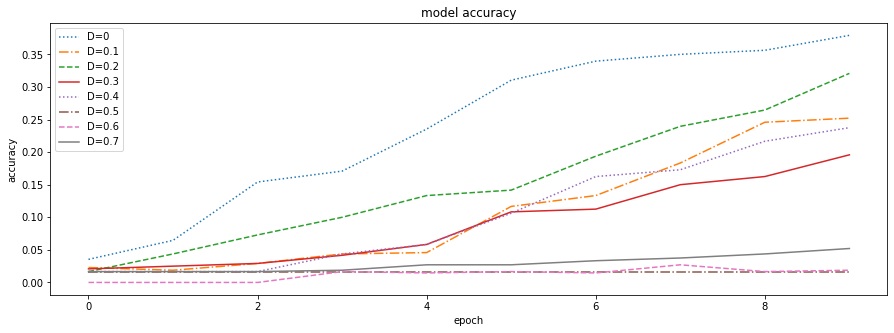

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

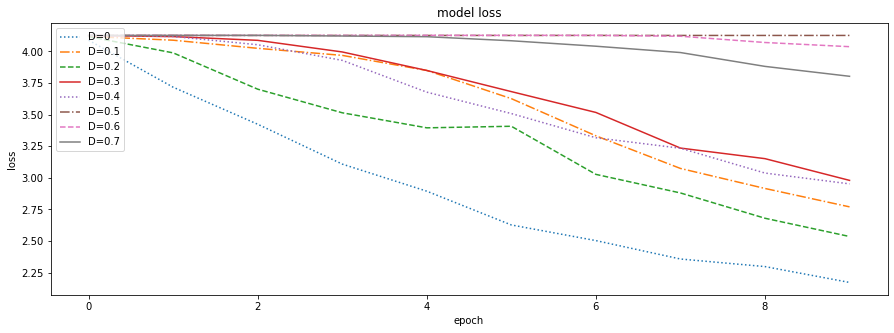

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_loss'],linestyle=styles[i])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

## Results of Experiment 5:
It is clearly visible from the plots that a model with no dropout Works best. 

## Experiment 6 : Advanced features

Instead of using one convolution layer of size 5x5, you can mimic 5x5 by using two consecutive 3x3 layers and it will be more nonlinear. Instead of using a max pooling layer, you can subsample by using a convolution layer with strides=2 and it will be learnable. Lastly, does batch normalization help? And does data augmentation help? Let's test all four of these

* replace '32C5' with '32C3-32C3'
* replace 'MP2' with '32C5S2'
* add batch normalization




In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 4
model = [0] *nets

j=0
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
model[j].add(MaxPooling2D())
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dense(62, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=1
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=input_shape))
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dense(62, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=2
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dense(62, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=3
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=input_shape))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dense(62, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
history = [0] * nets
names = ["basic","32C3-32C3","32C5S2","both+BN"]

for j in range(nets):
  history[j] = model[j].fit_generator(datagenerator, 
                            steps_per_epoch= datagenerator.samples // batch_size,
                            epochs=epochs, 
                            validation_data=validation_generator, 
                            validation_steps=validation_generator.samples // batch_size, 
                            #  verbose=0, 
                            callbacks=[annealer],
                            #  workers=8
                            )
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - 34s 550ms/step - loss: 4.1672 - accuracy: 0.0193 - val_loss: 4.1040 - val_accuracy: 0.0312
Epoch 2/10
62/62 [==============================] - 34s 542ms/step - loss: 4.0960 - accuracy: 0.0257 - val_loss: 3.9241 - val_accuracy: 0.0542
Epoch 3/10
62/62 [==============================] - 34s 545ms/step - loss: 3.8610 - accuracy: 0.0671 - val_loss: 3.6424 - val_accuracy: 0.0833
Epoch 4/10
62/62 [==============================] - 34s 544ms/step - loss: 3.4714 - accuracy: 0.1049 - val_loss: 3.2910 - val_accuracy: 0.1396
Epoch 5/10
62/62 [==============================] - 34s 544ms/step - loss: 3.1455 - accuracy: 0.1689 - val_loss: 2.9655 - val_accuracy: 0.2396
Epoch 6/10
62/62 [==============================] - 33s 541ms/step - loss: 2.7444 - accuracy: 0.2675 - val_loss: 2.7073 - val_accuracy: 0.2500
Epoch 7/10
62/62 [==============================] - 34s 542ms/step - loss: 2.4325 - accuracy: 0.3330 - val_loss: 2.5119 - val_accuracy: 0.2979

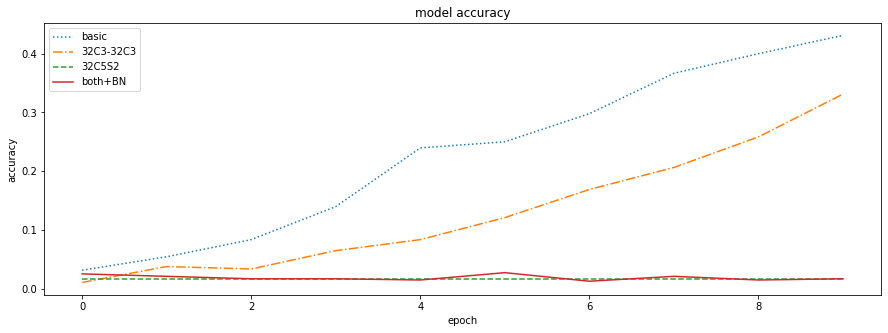

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

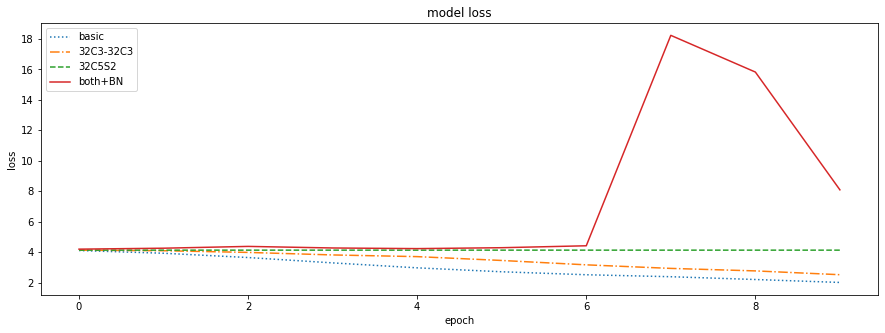

In [ ]:

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_loss'],linestyle=styles[i])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

## Results of Experiment 5:
From the Plots, it is clearly Visible that A Basic model is enough and Adding Advanced features just detriots the Performance. The reason of this could be the fact that we just have 40 Images per class and We have 62 classes! So There is very less data to train on and hence Adding Advanced features and Any regularisation just detroits the performance of the Model.

# The Best Architecture:

In [ ]:
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=input_shape))
model[j].add(MaxPooling2D())
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dense(62, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Resources Used :

  
* Chris Deotte's Kaggle Kernel on how to choose the best Model Architecture: https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

* Blog for using Data generators : https://towardsdatascience.com/image-data-generators-in-keras-7c5fc6928400


* Stack overflow for general programming doubts : https://stackoverflow.com/ 

* Official Documentation of python libraries










